# Problem Statement
### Oil prices are difficult to forecast due to externalities, but our aim is to build the model which can help us to understand the pattern and make smart decision for customers and businesses.

## EDA
  - EDA is a crusial but important step in data analysis.
  - Exploratory data analysis is an approach to analyze the data using visualization and statistical techniques.

# Steps in EDA
  - Describing the data
  - Data Cleaning
  - Data Manupilation
  - Data Analysis & Visualization
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
oil = pd.read_csv('Oil.csv')

In [3]:
oil.head(10)

,Date,Price
0,1985-01-02,25.92
1,1985-01-03,25.84
2,1985-01-04,25.18
3,1985-01-07,25.56
4,1985-01-08,25.48
5,1985-01-09,25.43
6,1985-01-10,25.76
7,1985-01-11,25.77
8,1985-01-14,26.12
9,1985-01-15,25.91


In [4]:
oil.tail(10)

,Date,Price
9750,2023-05-10,72.56
9751,2023-05-11,70.87
9752,2023-05-12,70.04
9753,2023-05-15,71.11
9754,2023-05-16,70.86
9755,2023-05-17,72.83
9756,2023-05-18,71.86
9757,2023-05-19,71.55
9758,2023-05-22,71.99
9759,2023-05-23,72.91


In [5]:
oil.shape

(9760, 2)

In [6]:
oil.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9755    False
9756    False
9757    False
9758    False
9759    False
Length: 9760, dtype: bool

In [7]:
oil.isnull().sum()

Date     0
Price    0
dtype: int64

In [8]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9760 non-null   object 
 1   Price   9760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 152.6+ KB


In [9]:
oil.describe()

,Price
count,9760.000000
mean,46.194611
std,29.333831
min,-37.000000
25%,20.210000
50%,35.715000
75%,67.705000
max,145.290000


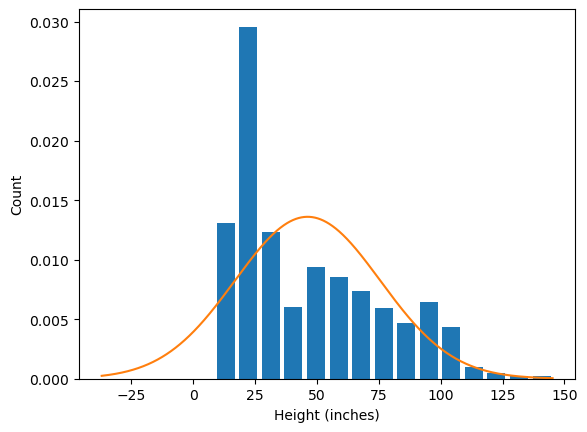

In [10]:
plt.hist(oil.Price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(oil.Price.min(), oil.Price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,oil.Price.mean(),oil.Price.std()))

# Outlier Detection

In [11]:
oil['Date']=pd.to_datetime(oil['Date'])

In [12]:
oil['year']=oil['Date'].dt.year
yearly_data = oil.groupby('year')

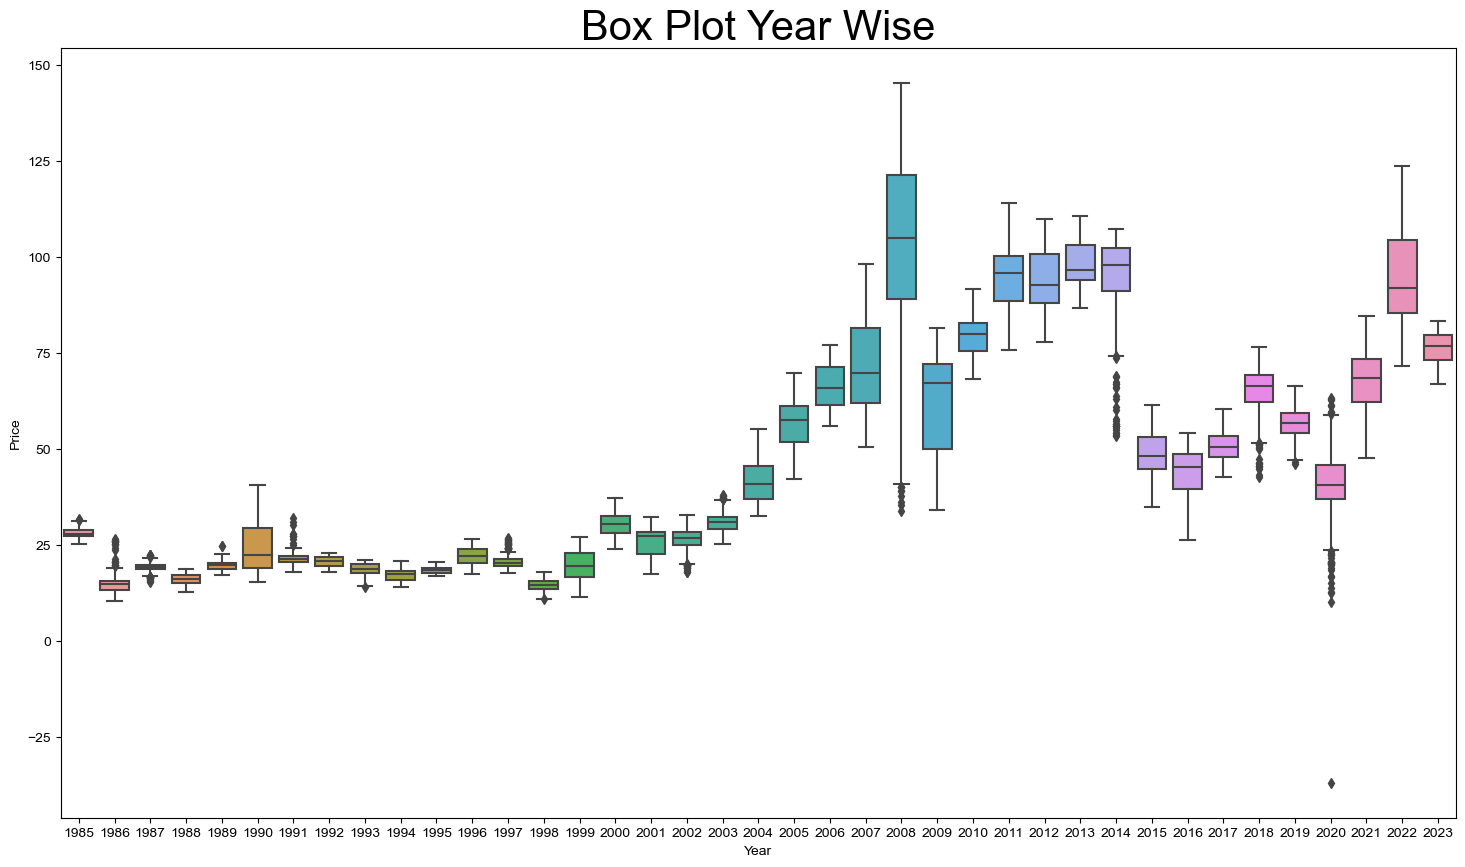

In [13]:
plt.figure(figsize=(18,10))
ax=sns.boxplot(x='year', y='Price', data=oil)
sns.set_style("whitegrid")
plt.xlabel("Year")
plt.ylabel("Price")
ax.set_title('Box Plot Year Wise',fontsize=30)
plt.show()

In [14]:
def cap_outliers(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    upper_cap = Q3 + 1.5 * IQR 
    lower_cap = Q1 - 1.5 * IQR
    capped_values = np.clip(x, lower_cap, upper_cap)
    return capped_values

In [15]:
#capping Method to replace outliers
capped_data = yearly_data.apply(lambda x: cap_outliers(x['Price']))

In [16]:
oil['New_Price'] = capped_data.reset_index(level=0, drop=True)

In [17]:
oil.to_csv('cleaned_data.csv', index=False)

In [18]:
oil1 = pd.read_csv('cleaned_data.csv')

In [19]:
oil1.head(10)

,Date,Price,year,New_Price
0,1985-01-02,25.92,1985,25.92
1,1985-01-03,25.84,1985,25.84
2,1985-01-04,25.18,1985,25.18
3,1985-01-07,25.56,1985,25.56
4,1985-01-08,25.48,1985,25.48
5,1985-01-09,25.43,1985,25.43
6,1985-01-10,25.76,1985,25.76
7,1985-01-11,25.77,1985,25.77
8,1985-01-14,26.12,1985,26.12
9,1985-01-15,25.91,1985,25.91


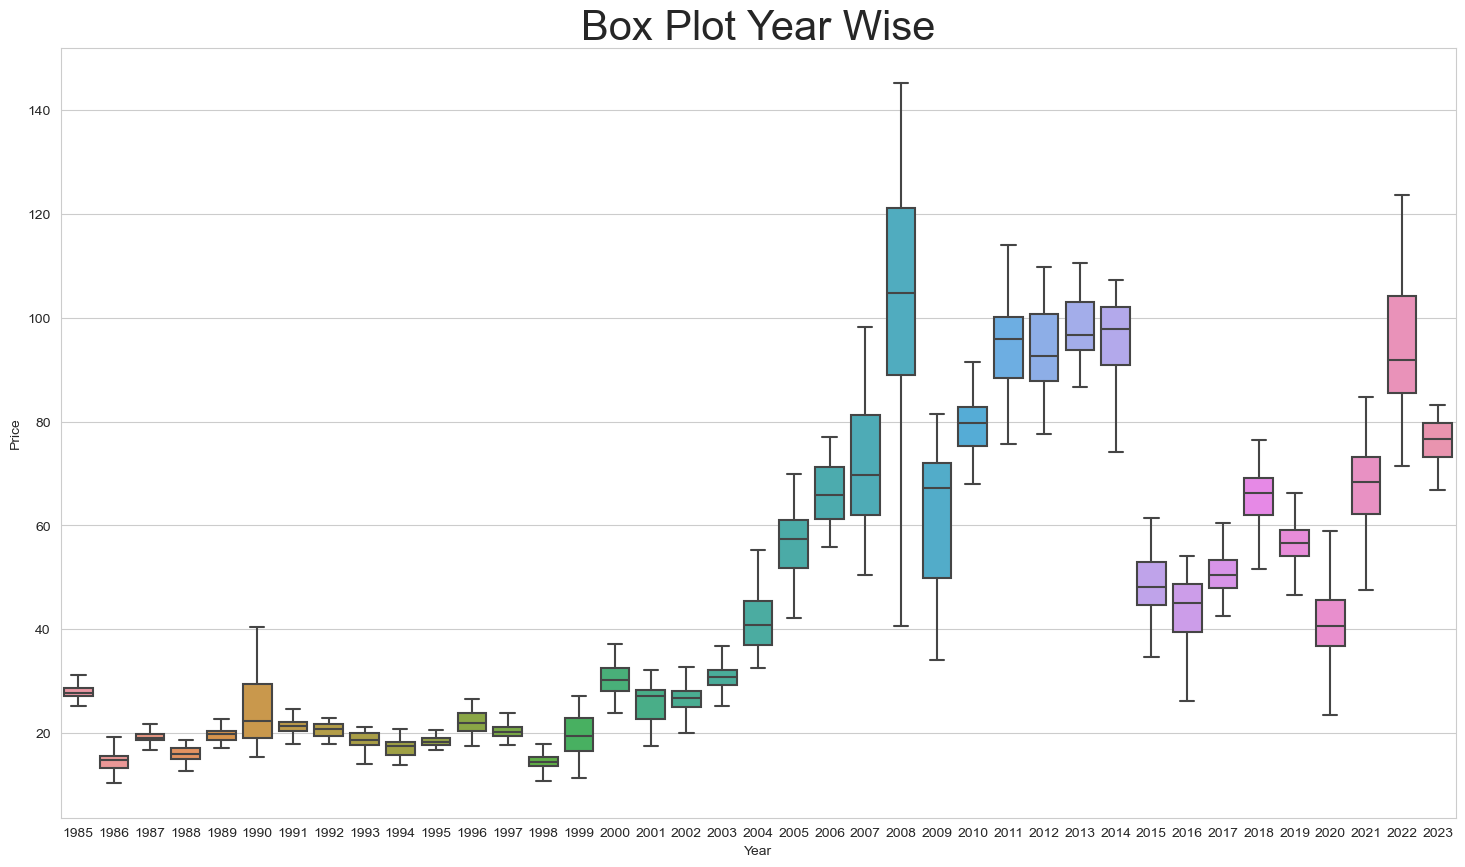

In [20]:
plt.figure(figsize=(18,10))
ax=sns.boxplot(x='year', y='New_Price', data=oil1)
sns.set_style("whitegrid")
plt.xlabel("Year")
plt.ylabel("Price")
ax.set_title('Box Plot Year Wise',fontsize=30)
plt.show()

In [21]:
oil2 = oil1.drop(columns=['year','Price'],axis=1)

In [22]:
oil2

,Date,New_Price
0,1985-01-02,25.92
1,1985-01-03,25.84
2,1985-01-04,25.18
3,1985-01-07,25.56
4,1985-01-08,25.48
...,...,...
9755,2023-05-17,72.83
9756,2023-05-18,71.86
9757,2023-05-19,71.55
9758,2023-05-22,71.99


In [23]:
oil2['Date'] = pd.to_datetime(oil2['Date'])
oil2.set_index('Date',inplace=True)

## Data Visualisation

Text(0.5, 1.0, 'Oil Price Trend')

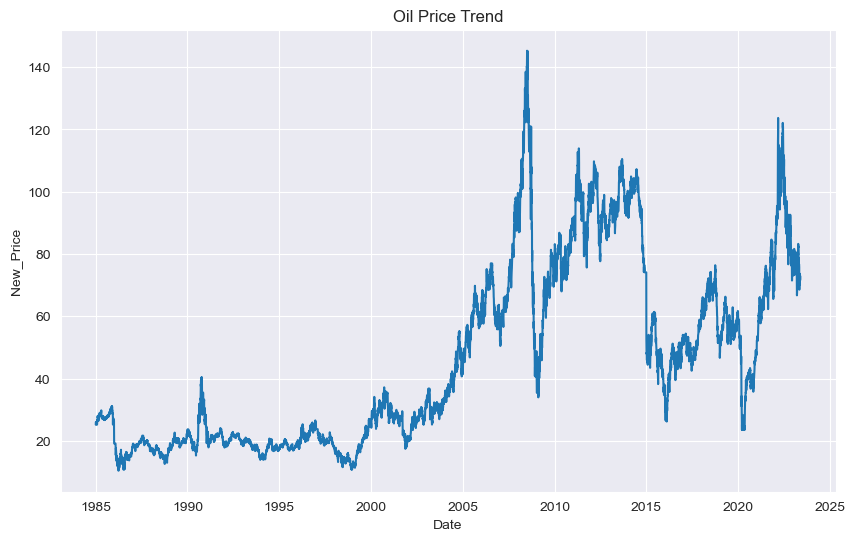

In [24]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(x='Date',y='New_Price',data=oil2)
plt.title('Oil Price Trend')

# Time Series Decomposition:

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

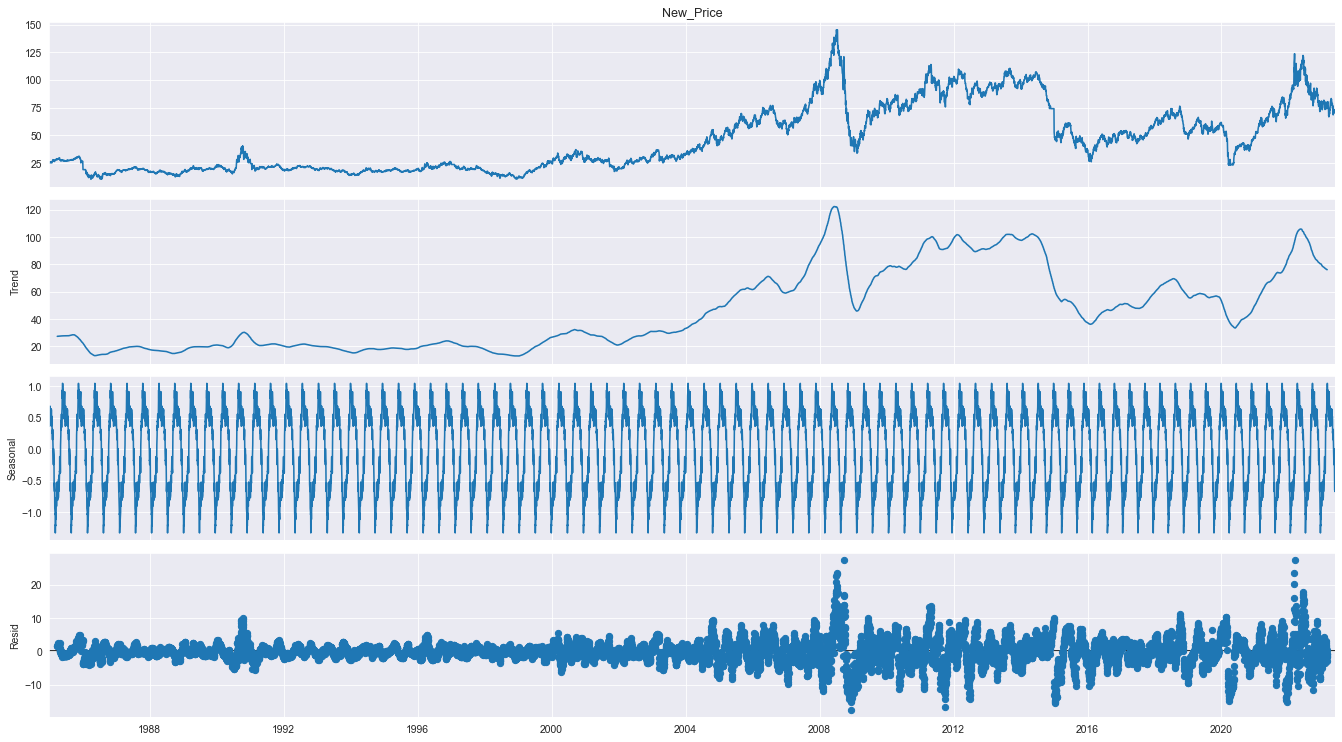

In [26]:
plt.rcParams.update({'figure.figsize':(18,10), 'figure.dpi':75})
decomposition = sm.tsa.seasonal_decompose(oil2['New_Price'], period=120)
decomposition.plot()
plt.show()

#  Testing For Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller

Null Hypothesis (H0):
If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1):
The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. We interpret this result using the p-value from the test.

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [28]:
test_result = adfuller(oil2['New_Price'])

In [29]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(New_Price):
    result=adfuller(New_Price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [30]:
adfuller_test(oil2['New_Price'])

ADF Test Statistic : -2.261595988734266
p-value : 0.18465322975363607
#Lags Used : 38
Number of Observations Used : 9721
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
oil2['Price First Difference'] = oil2.diff()

In [32]:
oil2.head(10)

,New_Price,Price First Difference
Date,,
1985-01-02,25.92,NaN
1985-01-03,25.84,-0.08
1985-01-04,25.18,-0.66
1985-01-07,25.56,0.38
1985-01-08,25.48,-0.08
1985-01-09,25.43,-0.05
1985-01-10,25.76,0.33
1985-01-11,25.77,0.01
1985-01-14,26.12,0.35


In [33]:
adfuller_test(oil2['Price First Difference'].dropna())

ADF Test Statistic : -13.505198610929291
p-value : 2.9245895269469566e-25
#Lags Used : 38
Number of Observations Used : 9720
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


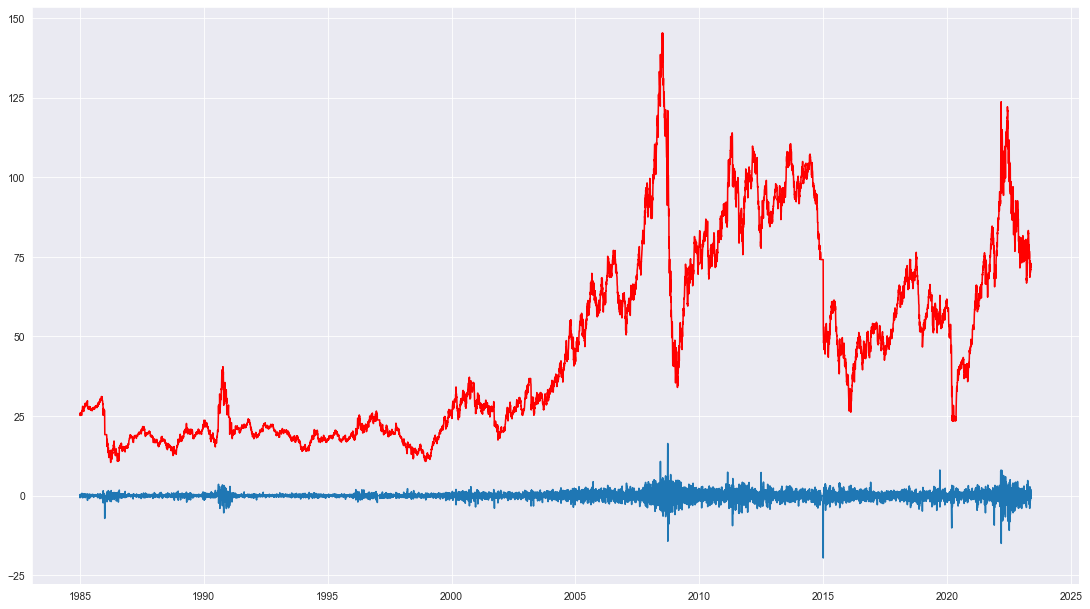

In [34]:
plt.plot(oil2['New_Price'],color='red',label='New_Price')
plt.plot(oil2['Price First Difference'])

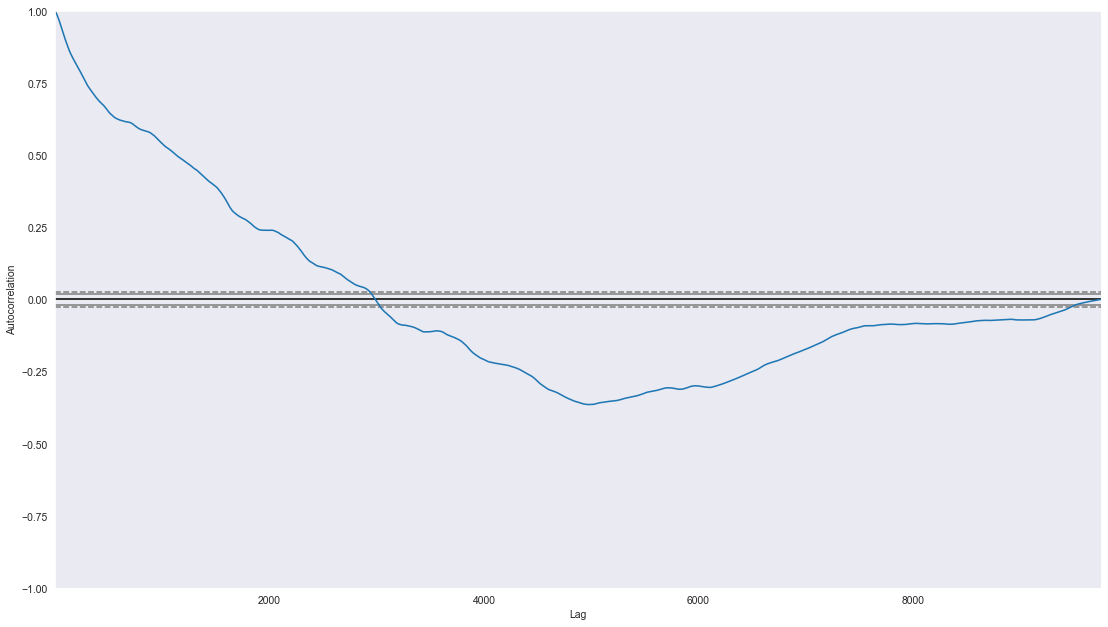

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil2['New_Price'])
plt.show()

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

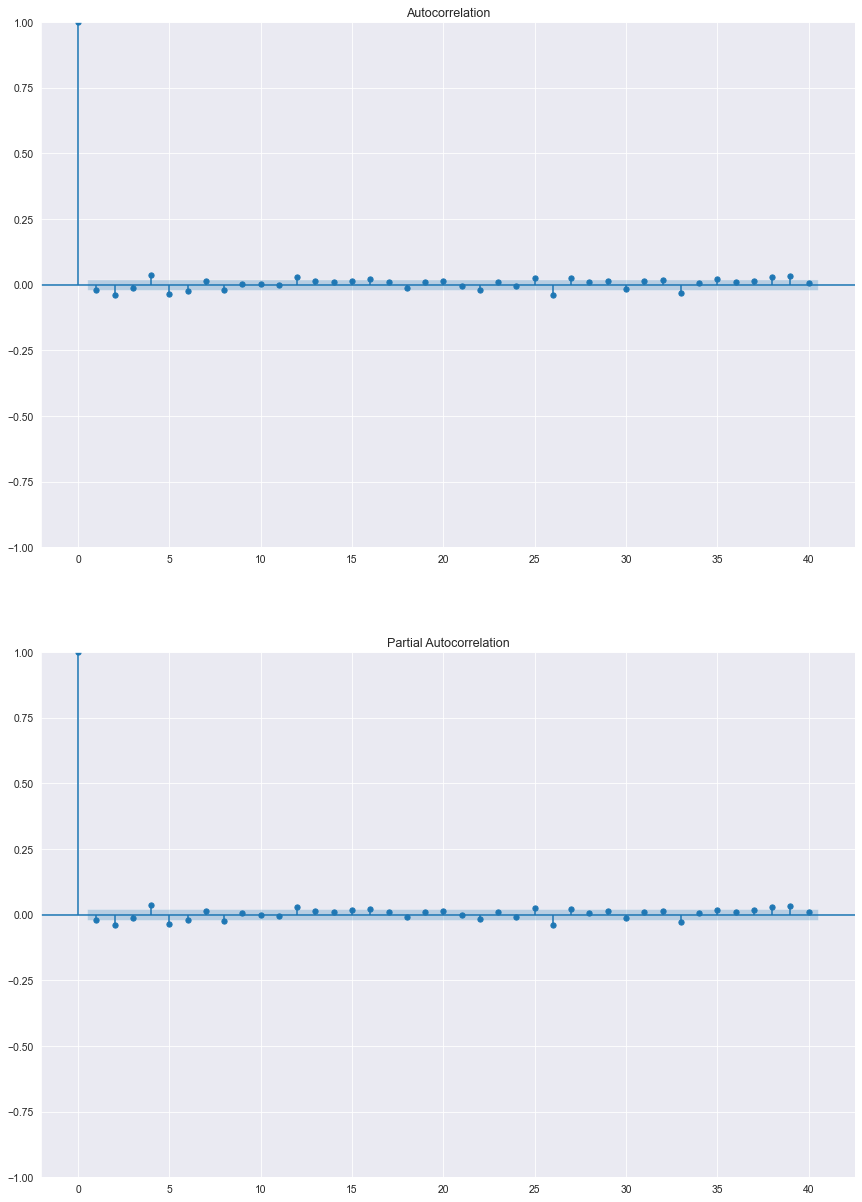

In [37]:
fig = plt.figure(figsize=(14,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(oil2['Price First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(oil2['Price First Difference'].iloc[13:],lags=40,ax=ax2)

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=4.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=4.

# Model Building

# 1. Prophet

In [38]:
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")

In [39]:
oil3=oil1.copy()

In [40]:
oil3 = oil1.drop(columns=['year','Price'],axis=1)
oil3

,Date,New_Price
0,1985-01-02,25.92
1,1985-01-03,25.84
2,1985-01-04,25.18
3,1985-01-07,25.56
4,1985-01-08,25.48
...,...,...
9755,2023-05-17,72.83
9756,2023-05-18,71.86
9757,2023-05-19,71.55
9758,2023-05-22,71.99


In [41]:
oil3.columns = ["ds","y"]

model = Prophet()
model.fit(oil3)

11:53:45 - cmdstanpy - INFO - Chain [1] start processing
11:53:54 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future = model.make_future_dataframe(periods= 30, freq='d')

In [43]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9785,2023-06-18,81.471521,71.448803,97.912072,81.471521,81.471521,2.766673,2.766673,2.766673,1.126438,1.126438,1.126438,1.640235,1.640235,1.640235,0.0,0.0,0.0,84.238194
9786,2023-06-19,81.486436,69.660431,96.051492,81.486436,81.486436,1.592178,1.592178,1.592178,-0.076628,-0.076628,-0.076628,1.668806,1.668806,1.668806,0.0,0.0,0.0,83.078614
9787,2023-06-20,81.501351,69.334747,97.307401,81.501351,81.501351,1.543107,1.543107,1.543107,-0.155523,-0.155523,-0.155523,1.698629,1.698629,1.698629,0.0,0.0,0.0,83.044458
9788,2023-06-21,81.516266,69.370135,95.717316,81.516266,81.516266,1.607506,1.607506,1.607506,-0.121700,-0.121700,-0.121700,1.729206,1.729206,1.729206,0.0,0.0,0.0,83.123772
9789,2023-06-22,81.531181,70.642251,96.417756,81.531181,81.531181,1.683365,1.683365,1.683365,-0.076643,-0.076643,-0.076643,1.760009,1.760009,1.760009,0.0,0.0,0.0,83.214547


In [44]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1985-01-02,24.800363,11.121908,37.918586
1,1985-01-03,24.807110,11.638450,37.740837
2,1985-01-04,24.753715,12.176602,38.158453
3,1985-01-07,24.635985,12.194490,38.285201
4,1985-01-08,24.513028,10.839963,37.175724


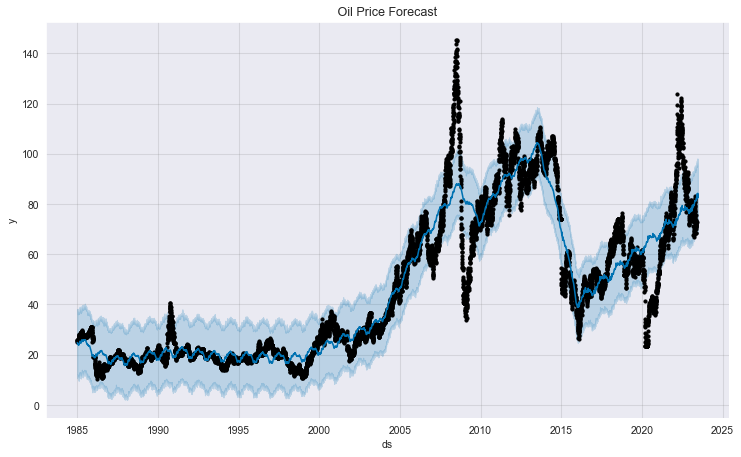

In [45]:
model.plot(forecast);
plt.title(" Oil Price Forecast ")
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = oil3['y'].values
y_pred = forecast['yhat'][:-30].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(y_true, y_pred)
print('RMSE: %.2f' % rmse)

MAE: 6.46
R-squared Score: 0.88
RMSE: 105.12


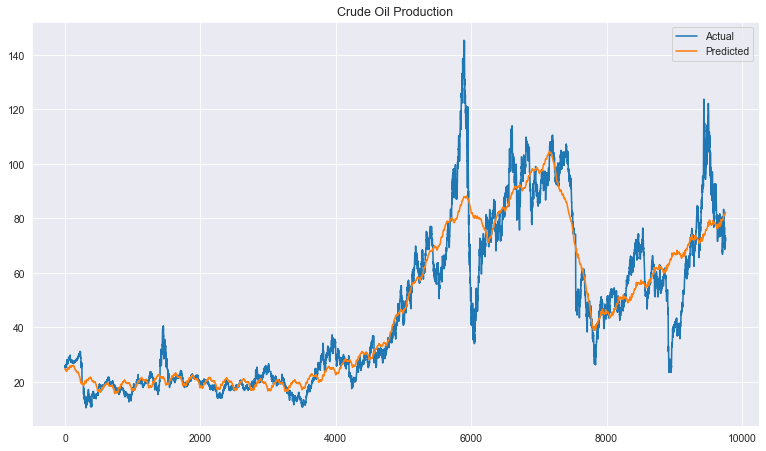

In [47]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Crude Oil Production")
plt.grid(True)
plt.legend()
plt.show()

# 2.LSTM

In [48]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [49]:
oil4 = oil1.copy()

In [50]:
oil4 = oil1.drop(columns=['year','Price'],axis=1)

In [51]:
scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = oil4.New_Price.values.reshape(-1, 1)
scaled = scaler.fit_transform(price)

seq_len = 60

def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, y_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled, seq_len, train_frac=0.8)

In [52]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, x_train.shape[-1])))
model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(Bidirectional(LSTM((window_size * 2), return_sequences=True))) 
model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False))) 
model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(x_train,y_train,epochs=10,batch_size=32,shuffle=False,validation_split=0.2)

Epoch 1/10
194/194 [==============================] - 64s 288ms/step - loss: 0.0033 - val_loss: 0.0722
Epoch 2/10
194/194 [==============================] - 52s 261ms/step - loss: 0.0011 - val_loss: 0.0424
Epoch 3/10
194/194 [==============================] - 49s 250ms/step - loss: 0.0014 - val_loss: 0.0456
Epoch 4/10
194/194 [==============================] - 54s 276ms/step - loss: 0.0030 - val_loss: 0.0647
Epoch 5/10
194/194 [==============================] - 50s 260ms/step - loss: 0.0054 - val_loss: 0.0558
Epoch 6/10
194/194 [==============================] - 49s 255ms/step - loss: 0.0059 - val_loss: 0.0489
Epoch 7/10
194/194 [==============================] - 49s 251ms/step - loss: 0.0054 - val_loss: 0.0323
Epoch 8/10
194/194 [==============================] - 49s 253ms/step - loss: 0.0043 - val_loss: 0.0323
Epoch 9/10
194/194 [==============================] - 51s 263ms/step - loss: 0.0041 - val_loss: 0.0206
Epoch 10/10
194/194 [==============================] - 51s 262ms/step - l

61/61 [==============================] - 3s 4ms/step


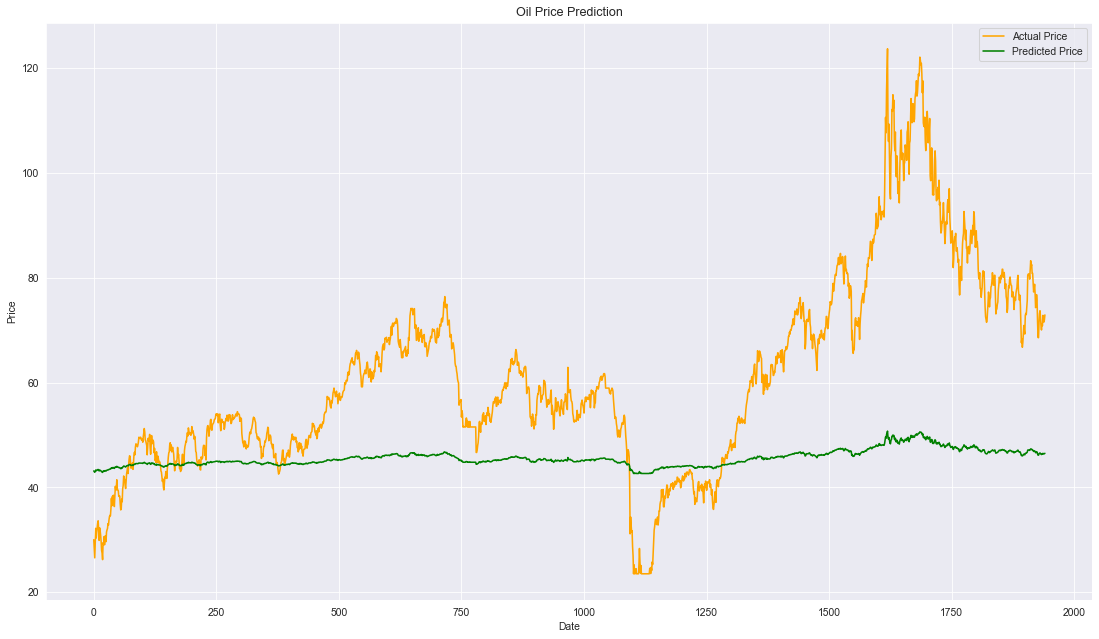

In [53]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Price', color='orange')
plt.plot(y_pred_orig, label='Predicted Price', color='green')
 
plt.title('Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show();

In [54]:
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print('MAE: %.2f' % mae)
r = r2_score(y_test_orig, y_pred_orig)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(y_test_orig, y_pred_orig)
print('RMSE: %.2f' % rmse)

MAE: 17.52
R-squared Score: -0.53
RMSE: 527.69


# 3. ARIMA

In [55]:
oil4 = oil1.copy()
oil4

,Date,Price,year,New_Price
0,1985-01-02,25.92,1985,25.92
1,1985-01-03,25.84,1985,25.84
2,1985-01-04,25.18,1985,25.18
3,1985-01-07,25.56,1985,25.56
4,1985-01-08,25.48,1985,25.48
...,...,...,...,...
9755,2023-05-17,72.83,2023,72.83
9756,2023-05-18,71.86,2023,71.86
9757,2023-05-19,71.55,2023,71.55
9758,2023-05-22,71.99,2023,71.99


In [56]:
oil4 = oil1.drop(columns=['year','Price'],axis=1)

In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [65]:
arima = ARIMA(oil4['New_Price'], order=(3,1,2)).fit()
predictions = arima.predict()

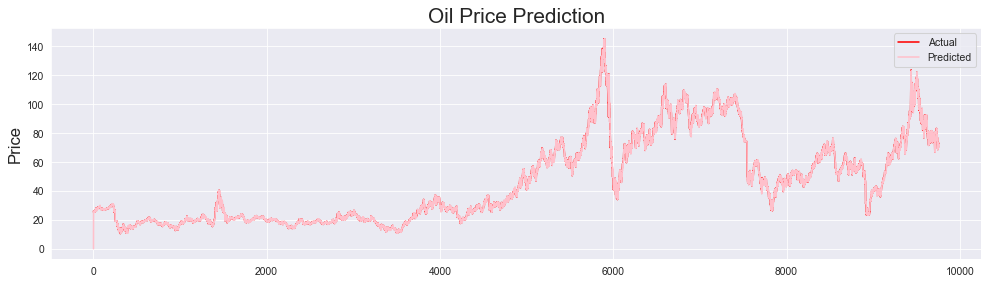

In [66]:
plt.figure(figsize=(16,4))
plt.plot(oil4.New_Price, label="Actual",  color='red')
plt.plot(predictions, label="Predicted",  color='pink')
plt.title('Oil Price Prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()

In [67]:
mae = mean_absolute_error(oil4.New_Price, predictions)
print('MAE: %.2f' % mae)
r = r2_score(oil4.New_Price, predictions)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(oil4.New_Price, predictions)
print('RMSE: %.2f' % rmse)

MAE: 0.74
R-squared Score: 1.00
RMSE: 1.55


In [70]:
import pickle as pkl

In [71]:
with open("arima_model.pkl","wb") as file:
    pkl.dump(arima,file)